In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("concrete_data.csv")

In [3]:
df.shape

(1030, 9)

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Cement - 0.5087389156389814


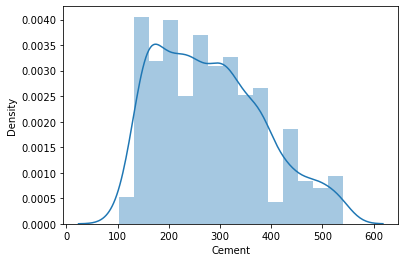

Blast Furnace Slag - 0.7995503309986295


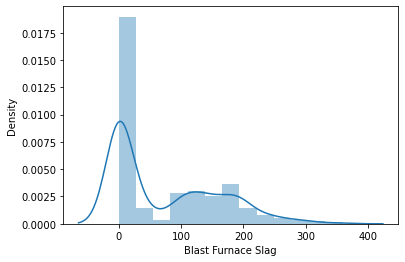

Fly Ash - 0.5365710347923704


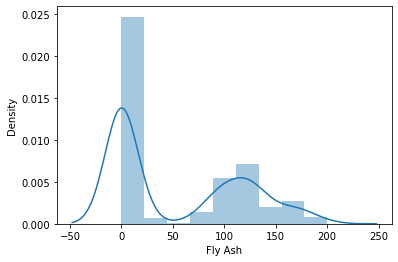

Water - 0.07451965817729818


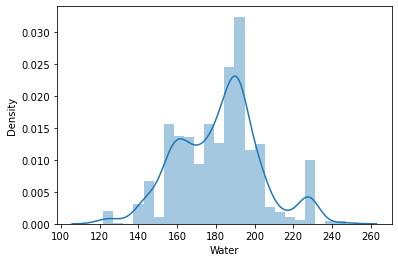

Superplasticizer - 0.9058808712519941


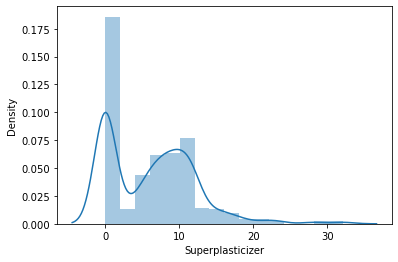

Coarse Aggregate - -0.040161148656697586


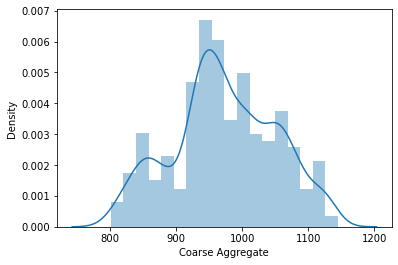

Fine Aggregate - -0.2526409879628952


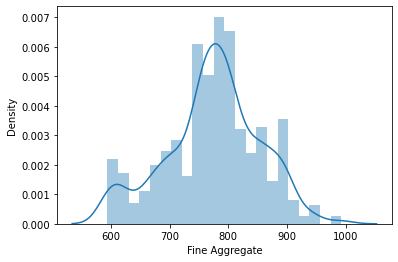

Age - 3.264414535416806


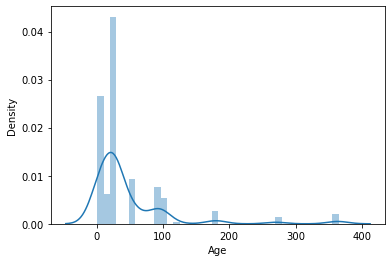

Strength - 0.41636979411469355


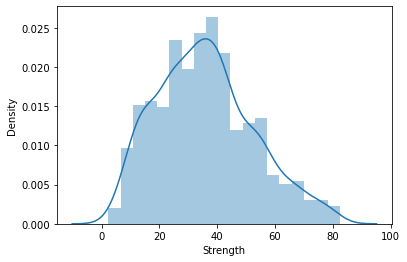

In [7]:
for col in df:
    print(col,"-",skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show()

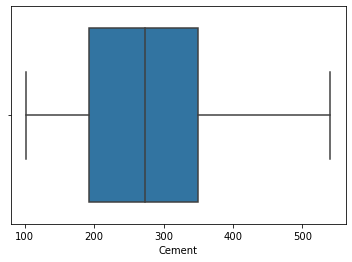

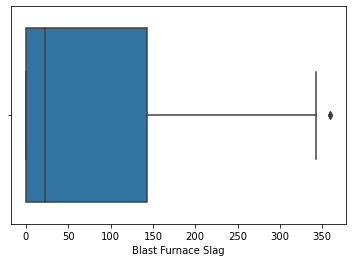

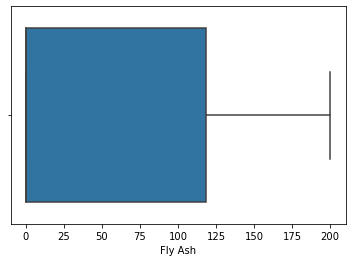

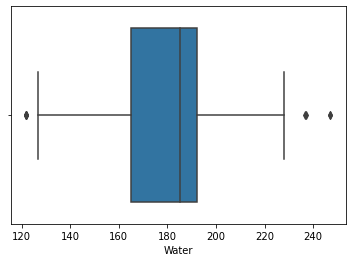

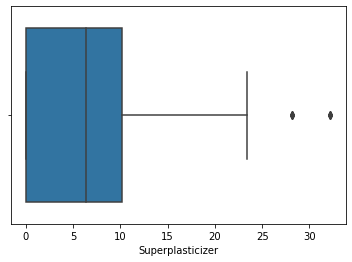

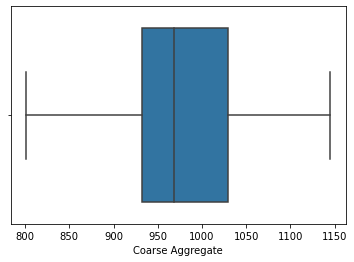

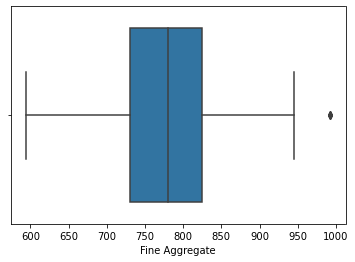

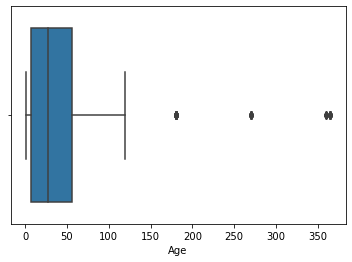

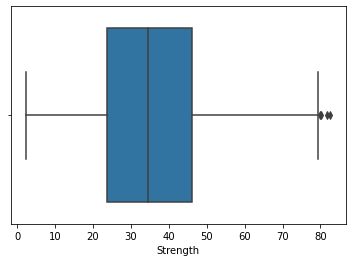

In [8]:
for col in df:
    plt.figure()
    sns.boxplot(df[col])
    plt.show()

In [9]:
# positive skewness in many columns
# extreme outlier in the age column

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [12]:
# baseline model
lr = LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test)

In [15]:
# training score
lr.score(X_train,y_train)

0.641189813795483

In [16]:
lr.score(X_test,y_test)

0.541480523893522

In [17]:
residuals = y_test - y_pred

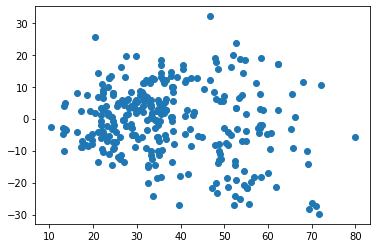

In [18]:
plt.scatter(y_pred,residuals)

<AxesSubplot:xlabel='Strength', ylabel='Density'>

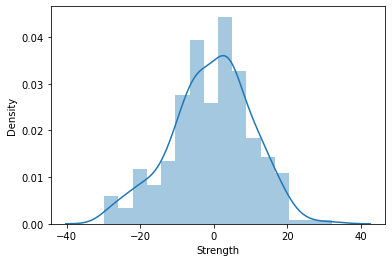

In [19]:
sns.distplot(residuals)

In [20]:
#outlier_index = df[df["Age"] > 300].index
outlier_index = df[df["Age"] > 250].index

In [21]:
df.drop(outlier_index,inplace=True)

<AxesSubplot:xlabel='Age'>

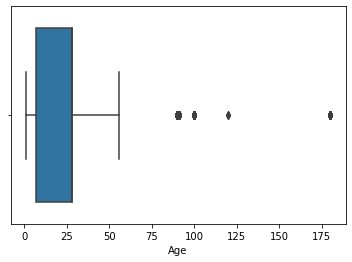

In [22]:
sns.boxplot(df["Age"])

In [23]:
for col in df:
    if skew(df[col]) > 0.5 or skew(df[col]) < -0.5:
        df[col] = np.sqrt(df[col])
        #df[col] = np.log(df[col])

Cement - 0.20469782728330868


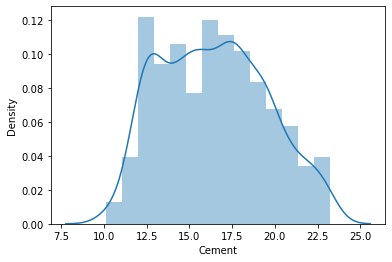

Blast Furnace Slag - 0.25686638970889175


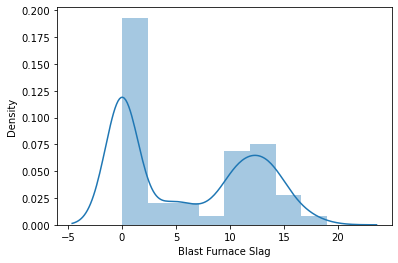

Fly Ash - 0.4833731613070419


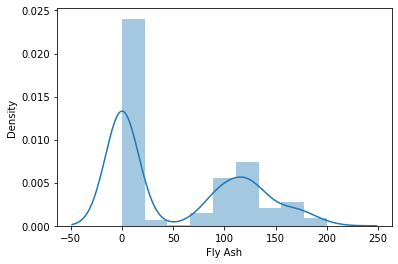

Water - 0.008502585586293973


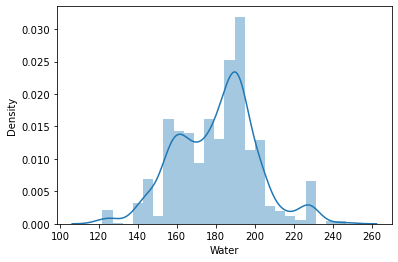

Superplasticizer - -0.2306845242127626


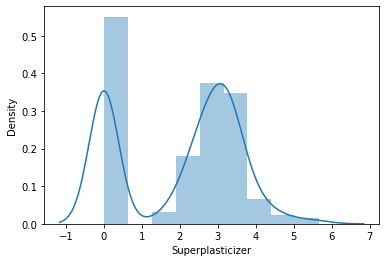

Coarse Aggregate - -0.07041507774960112


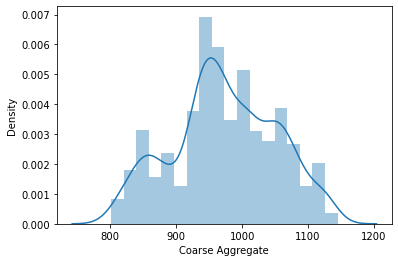

Fine Aggregate - -0.224313044730754


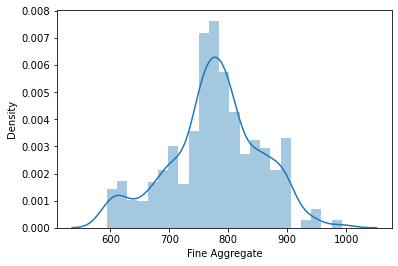

Age - 0.7779144135046183


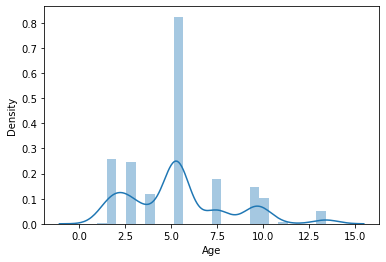

Strength - 0.452727022736517


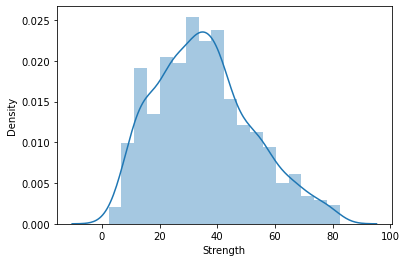

In [24]:
for col in df:
    print(col,"-",skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [25]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,23.237900,0.000000,0.0,162.0,1.581139,1040.0,676.0,5.291503,79.99
1,23.237900,0.000000,0.0,162.0,1.581139,1055.0,676.0,5.291503,61.89
5,16.309506,10.677078,0.0,228.0,0.000000,932.0,670.0,9.486833,47.03
7,19.493589,9.746794,0.0,228.0,0.000000,932.0,594.0,5.291503,36.45
8,16.309506,10.677078,0.0,228.0,0.000000,932.0,670.0,5.291503,45.85


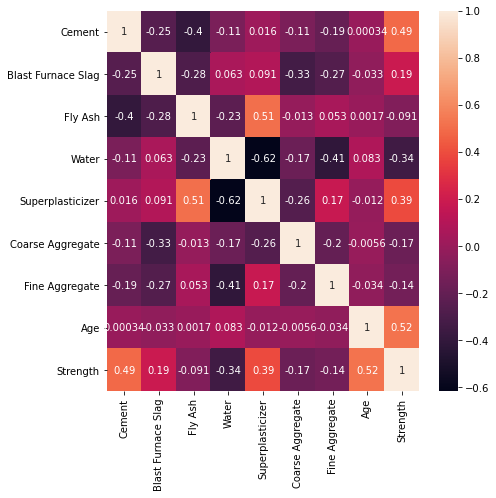

In [26]:
# multicolinearity
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [27]:
#df.drop(["Superplasticizer"],axis=1,inplace=True)
df.drop(["Water","Fly Ash"],axis=1,inplace=True)

In [28]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [30]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train_ss,y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(X_test_ss)

In [34]:
lr.score(X_train_ss,y_train)

0.7663549190369917

In [35]:
lr.score(X_test_ss,y_test)

0.7635848431246677

In [36]:
residuals = y_test - y_pred

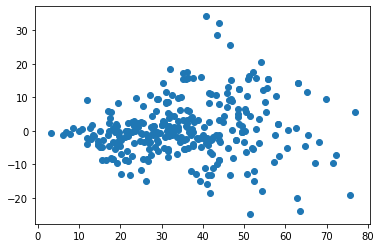

In [37]:
plt.scatter(y_pred,residuals)

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
pf = PolynomialFeatures(3)

In [40]:
X_train_poly = pf.fit_transform(X_train_ss)
X_test_poly = pf.transform(X_test_ss)

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(X_train_poly,y_train)

LinearRegression()

In [43]:
y_pred = lr.predict(X_test_poly)

In [44]:
lr.score(X_train_poly,y_train)

0.8950180267376674

In [45]:
lr.score(X_test_poly,y_test)

0.8688265728517663